
# CS-GY 6903 Applied Cryptography
## Project 1
### Nicola Maiorana (nam10102)
### Spring 2025, NYU Tandon School of Engineering

Submission
1. Project report using PDF format (proj1_your_name.pdf).
    - Ensure that your submission is clear, well-organized, and comprehensively covers all aspects of the assignment.
    - Use appropriate headings and mark the problem numbers clearly for easy reference.
    - May include codes in the report. Students still need to submit the Jupyter Notebook.
2. Jupyter Notebook (proj1-Your_name.ipynb)
    - Students shall use Jupyter Notebook for the coding.
    - The Jupyter Notebook file shall contain all the coding solutions. It should be well-commented, indicating what each segment does, and should correspond to the problems as numbered in the assignment.
    - Ensure that the notebook is executable without errors and that the outputs of your code are visible. For example, add all the pip install statements in a code box at the top of your ipynb notebook if they are not installed already in the CA’s machine.


## Install the required modules

In [92]:
!pip install jupyter==1.1.1
!pip install notebook==7.3.2
!pip install matplotlib


## Problem 1: Vigenère cipher

(a) Encrypt the message using the Vigenère cipher with the given key, k = ‘apple’ to the message, m = ‘theclassistough’ to produce the ciphertext. Then (b) decrypt the ciphertext back to retrieve the original plaintext. Show your work.

- Key is of the form K = (k0,k1,...,kn-1), Where each ki E {0,1,2,...,25}
- Encryption:   ci= pi+ ki (mod n)(mod 26), i= 0,1,2, ... , L
- Decryption:   pi= ci–ki (mod n)(mod 26), i= 0,1,2, ... , L
- Just a repeating sequence of (shift by n) simple substitutions•Obviously, when n = 1, it reduces to the Caesar Cipher. 34


### Experimenting with the math

In [15]:
k = 'apple'
p = 'theclassistough'
n = len(p)
print(f'n is {n}')

# key Generation
# Key is of the form K = (k0,k1,...,kn-1), Where each ki E {0,1,2,...,25}
# The generated key ends up being the k value fit into the length of the message as many times as possible
g = 'appleappleapplea'

# Encryption
# Encryption:   ci= pi+ ki (mod n)(mod 26), i= 0,1,2, ... , L
# For the first letter
pi = 't'
ki = 'a'
print(f"'{pi}' is {ord(pi)}")
print(f"'{ki}' is {ord(ki)}")
ki_mod_15 = ord(ki) % n
print(f"{ord(ki)} mod {n} is {ki_mod_15}")
ki_mod_15_mod_26 = ki_mod_15 % 26
print(f'{ki_mod_15} mod 26  is {ki_mod_15_mod_26}')
ci = ord(pi) + ki_mod_15_mod_26
print(f"ci is '{chr(ci)}': {ci} = {ord(pi)} + {ki_mod_15_mod_26}")

# Decryption
# Decryption:   pi= ci–ki (mod n)(mod 26), i= 0,1,2, ... , L
# For the first letter
di = ci - ki_mod_15_mod_26
print(f"di is '{chr(di)}': {di} = {ci} - {ki_mod_15_mod_26}")

n is 15
't' is 116
'a' is 97
97 mod 15 is 7
7 mod 26  is 7
ci is '{': 123 = 116 + 7
di is 't': 116 = 123 - 7


## Key Generaton:
Part of problem 1 a and b is to generate the key which is the original key, repeating as many times as needed to match the length of the message. Since our key is 'apple' and our message is 'theclassistough', our key will looke like this (showing the message above to demonstrate they are the same length):
```plaintext
'theclassistough'
'appleappleapple'
```

## Part a: Encrypt the message using the Vigenère cipher with the given key, k = ‘apple’ to the message, m = ‘theclassistough’ to produce the ciphertext.
For this we need to start by encoding the letters of both the message and they key:

- 'theclassistough'
    - t = 116
    - h = 104
    - e = 101
    - c = 99
    - l = 108
    - a = 97
    - s = 115
    - s = 115
    - i = 105
    - s = 115
    - t = 116
    - o = 111
    - u = 117
    - g = 103
    - h = 104
- 'appleappleapple'
    - a = 97
    - p = 112
    - p = 112
    - l = 108
    - e = 101
    - a = 97
    - p = 112
    - p = 112
    - l = 108
    - e = 101
    - a = 97
    - p = 112
    - p = 112
    - l = 108
    - e = 101

Now that we have the ascii values for each of the characters, we can encrypt the message using the following formula:
- ci= pi+ ki (mod n)(mod 26), i= 0,1,2, ... , L
- n is 15 which is the number of characters in the message
    - '{' or 123 = 116 + ((97 mod 15) mod 26)
    - 'o' or 111 = 104 + ((112 mod 15) mod 26)
    - 'l' or 108 = 101 + ((112 mod 15) mod 26)
    - 'f' or 102 = 99 + ((108 mod 15) mod 26)
    - 'w' or 119 = 108 + ((101 mod 15) mod 26)
    - 'h' or 104 = 97 + ((97 mod 15) mod 26)
    - 'z' or 122 = 115 + ((112 mod 15) mod 26)
    - 'z' or 122 = 115 + ((112 mod 15) mod 26)
    - 'l' or 108 = 105 + ((108 mod 15) mod 26)
    - '~' or 126 = 115 + ((101 mod 15) mod 26)
    - '{' or 123 = 116 + ((97 mod 15) mod 26)
    - 'v' or 118 = 111 + ((112 mod 15) mod 26)
    - '|' or 124 = 117 + ((112 mod 15) mod 26)
    - 'j' or 106 = 103 + ((108 mod 15) mod 26)
    - 's' or 115 = 104 + ((101 mod 15) mod 26)
- And the ciphertext is: '{olfwhzzl~{v|js'

## Part b: Decrypt the ciphertext back to retrieve the original plaintext. Show your work.
- Decryption:   pi= ci–ki (mod n)(mod 26), i= 0,1,2, ... , L
- n is 15 which is the number of characters in the ciphertext
    - 't' or 116 = 123 - ((97 mod 15) mod 26)
    - 'h' or 104 = 111 - ((112 mod 15) mod 26)
    - 'e' or 101 = 108 - ((112 mod 15) mod 26)
    - 'c' or 99 = 102 - ((108 mod 15) mod 26)
    - 'l' or 108 = 119 - ((101 mod 15) mod 26)
    - 'a' or 97 = 104 - ((97 mod 15) mod 26)
    - 's' or 115 = 122 - ((112 mod 15) mod 26)
    - 's' or 115 = 122 - ((112 mod 15) mod 26)
    - 'i' or 105 = 108 - ((108 mod 15) mod 26)
    - 's' or 115 = 126 - ((101 mod 15) mod 26)
    - 't' or 116 = 123 - ((97 mod 15) mod 26)
    - 'o' or 111 = 118 - ((112 mod 15) mod 26)
    - 'u' or 117 = 124 - ((112 mod 15) mod 26)
    - 'g' or 103 = 106 - ((108 mod 15) mod 26)
    - 'h' or 104 = 115 - ((101 mod 15) mod 26)
- And the plaintext is: 'theclassistough'

## Problem2: Affine Cipher
The Affine cipher is a type of monoalphabetic substitution cipher that employs modular arithmetic to encrypt the letters of a message. The encryption formula is c = (a * p + b) mod n, where 'p' is the plaintext letter, 'c' is the ciphertext letter, 'n' is the modulus. 'a' and 'b' are keys, and 'a' must be chosen such that 'a' and 'n' are coprime (relatively prime). In this cipher, each letter of the plaintext is converted into an integer, for example, A=0, B=1, C=2, and so on.

p = a^-1(c - b) mod 26

### a) What is the size of key space for a fixed modular n?
Students can use the notation of the Euler's totient Φ(n) which is defined as the number of integers less than n and relative prime to n.
Since the key space is the number of possible keys that can be used, we need to find the number of possible keys for a fixed modular n. This is the same as finding the number of integers less than n that are relatively prime to n. The formula for the Euler's totient is:
- Φ(n) = n * (1 - 1/p1) * (1 - 1/p2) * ... * (1 - 1/pn)

where p1, p2, ..., pn are the prime factors of n.

An example of this for n = 26 is:
- Φ(26) = 26 * (1 - 1/2) * (1 - 1/13) = 12

This means that key a has 12 numbers that are coprime to 26, so there are 12 possible keys.

Key b can be any integer between 0 and 25 or 26 values. This means the total key space for n = 26 would be 12 X 26 or 312.


### b) Imagine you're a cryptographer tasked with sending a secure message using the Affine Cipher.
Your message consists only of capital letters, and you've decided to use the encryption formula c = 5p+9 mod 26 and do it manually. What is the ciphertext for the plaintext “CRYPTOISFUN”?

Using the encoding of A=0, B=1, C=2, ..., Z=25, we can find the following:

- C = 2
- R = 17
- Y = 24
- P = 15
- T = 19
- O = 14
- I = 8
- S = 18
- F = 5
- U = 20
- N = 13

Now we can encrypt the message using the formula c = 5p+9 mod 26:
- 'C' to 'T' or 19 = (5 * 2 + 9) mod 26
- 'R' to 'Q' or 16 = (5 * 17 + 9) mod 26
- 'Y' to 'Z' or 25 = (5 * 24 + 9) mod 26
- 'P' to 'G' or 6 = (5 * 15 + 9) mod 26
- 'T' to 'A' or 0 = (5 * 19 + 9) mod 26
- 'O' to 'B' or 1 = (5 * 14 + 9) mod 26
- 'I' to 'X' or 23 = (5 * 8 + 9) mod 26
- 'S' to 'V' or 21 = (5 * 18 + 9) mod 26
- 'F' to 'I' or 8 = (5 * 5 + 9) mod 26
- 'U' to 'F' or 5 = (5 * 20 + 9) mod 26
- 'N' to 'W' or 22 = (5 * 13 + 9) mod 26
- Ciphertext is 'TQZGABXVIFW'



### c) Eve has intercepted a ciphertext “QJKESREOGHGXXREOXEO” and,
 through her intelligence sources, discovered that it’s encrypted using an Affine Cipher. She also has limited information about the encryption process: the letter 'T' is encrypted to 'H' and 'O' to 'E'. With this knowledge, she aims to decrypt the message. Your challenge is to help Eve by developing a method to find the decryption function of the Affine Cipher using the given information. You do it manually. Show your work.

The answer is that a=11 and b=6. This was derived as follows:

We can help Eve by plugging in the know values for each known computation and subtracting the formulas from each other.

We know:
- 'T' or 19 encrypts to 'H' or 7 = (a * 19 + b) mod 26 = (19a + b) mod 26 = 7
- 'O' or 14 encrypts to 'E' or 4 = (a * 14 + b) mod 26 = (14a + b) mod 26 = 4

- 'H' or 7 decrypts to 'H' or 19 = a^-1(7 - b) mod 26
- 'E' or 4 decrypts to 'O' or 14 = a^-1(4 - b) mod 26

***a^-1 is the inverse of the mod 26 not 1/a***

from class lecture:
- $$ p = a^{-1}(c - b) mod 26 $$
- $$ p = ca - ba mod 26 $$

- 7 = 19a + b
- 4 = 14a + b
- subtracting the two formulas:
- 3 = 5a + 0
-   3 is same as 23 mod 26
- 23 mod 26 = 5a
    - divide by 5
- a = 23 * 5^-1

Using Euclid's algorithm we can find the modular inverse of 5^-1:
- 26 = 5 X (5) + 1
- 5 = 1 X (5) + 0
- Stop

Backward substitution:
- 1 = 26 - 5 X (5)
- 26 - 1 = 5 X (5)
- 1 (mod 26) = 5 X (5)

- a = 23 * 5
- a = 11 (mod 26)

Plugging back into the original formulas
- 4 = 14(11) + b
- b = 4 - 14(11) mod 26
- b = 6

or

7 = 19(11) + b
b = 7 - 19(11) mod 26
b = 6

The results are that a = 11 and b = 6
- 7 = 19 X (11) + 6 mod 26
- 4 = 14 X (11) + 6 mod 26

To decrypt:
- 19 = a^-1(7 - b) mod 26
- 14 = a^-1(4 - b) mod 26

- 19 = 11^-1(7 - 6) mod 26
- 14 = 11^-1(4 -6) mod 26

### Programming proof

In [98]:
a = 11
# from Wolfram Alpha
a_inverse = 19
b = 6
c = 7
p = (a_inverse * (c -b)) % 26
print(p)
c = 4
p = (a_inverse * (c -b)) % 26
print(p)

19
14


## Problem 3 Frequency Analysis
Alice has crafted a message for Bob using a simple substitution cipher. The encrypted message, segmented is "TNFOS FOZSW PZLOC GQAOZ WAGQR PJZPN ABCZP QDOGR AMTHA RAXTB AGZJO GMTHA RAVAP ZW", where spaces are not part of the original encryption and are added only for convenience. Eve, who has intercepted the message, knows that the word "liberty" appears somewhere in the plaintext.

### a) Calculate the Size of the Key Space. Explain how the key space is calculated and its implications for the cipher's security.

For a simple substitution the keyspace is 26! or 403X10^24. There are 26 letters in the alphabet and 26 possible letters to substitute for each letter. This means that there are 26! possible keys. This is a very large number and would be very difficult to brute force. The implications for the cipher's security is that it is very secure and would be difficult to break without knowing the key.

### b) Given Eve's knowledge that the word "liberty" is in the plaintext, devise a strategy to decrypt the message.
This task requires analyzing the ciphertext, making educated guesses, and testing hypotheses about the cipher's key. Your goal is to uncover the original message sent by Alice to Bob. You can solve it using any resources you have. A detailed explanation of your method is required.

First, lets get the string normalized so we can do some statistical analysis on it. We will remove all spaces and make all the letters uppercase.



In [89]:
# Normalize the string by removing spaces and making all the letters uppercase
ciphertext = "TNFOS FOZSW PZLOC GQAOZ WAGQR PJZPN ABCZP QDOGR AMTHA RAXTB AGZJO GMTHA RAVAP ZW"
ciphertext = ciphertext.replace(" ", "").upper()
print(f"Normalized Ciphertext: '{ciphertext}'")

Normalized Ciphertext: 'TNFOSFOZSWPZLOCGQAOZWAGQRPJZPNABCZPQDOGRAMTHARAXTBAGZJOGMTHARAVAPZW'


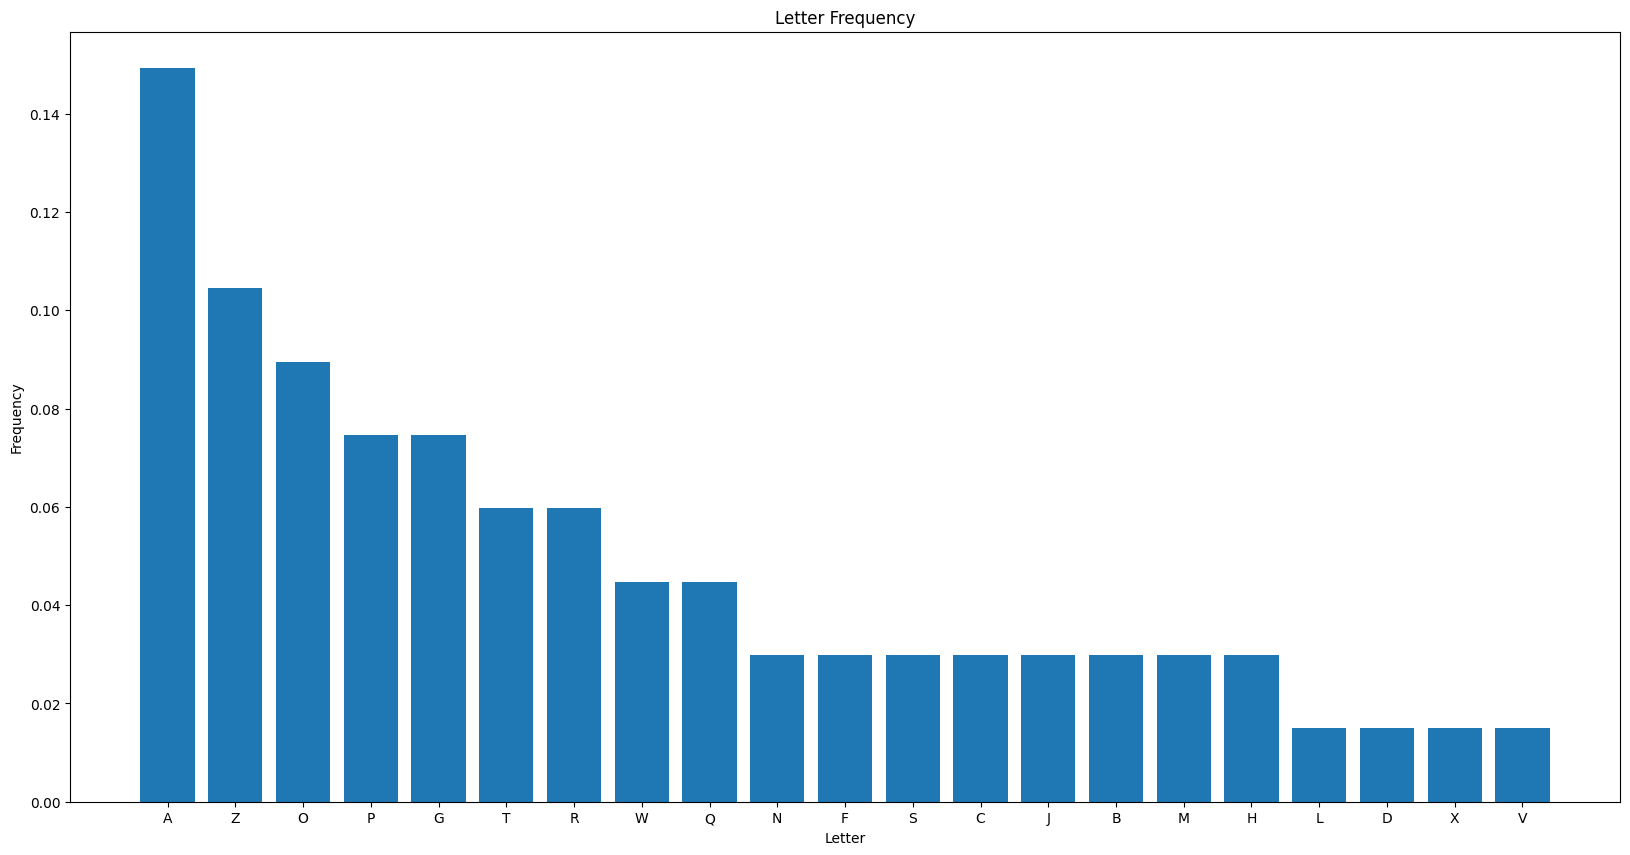

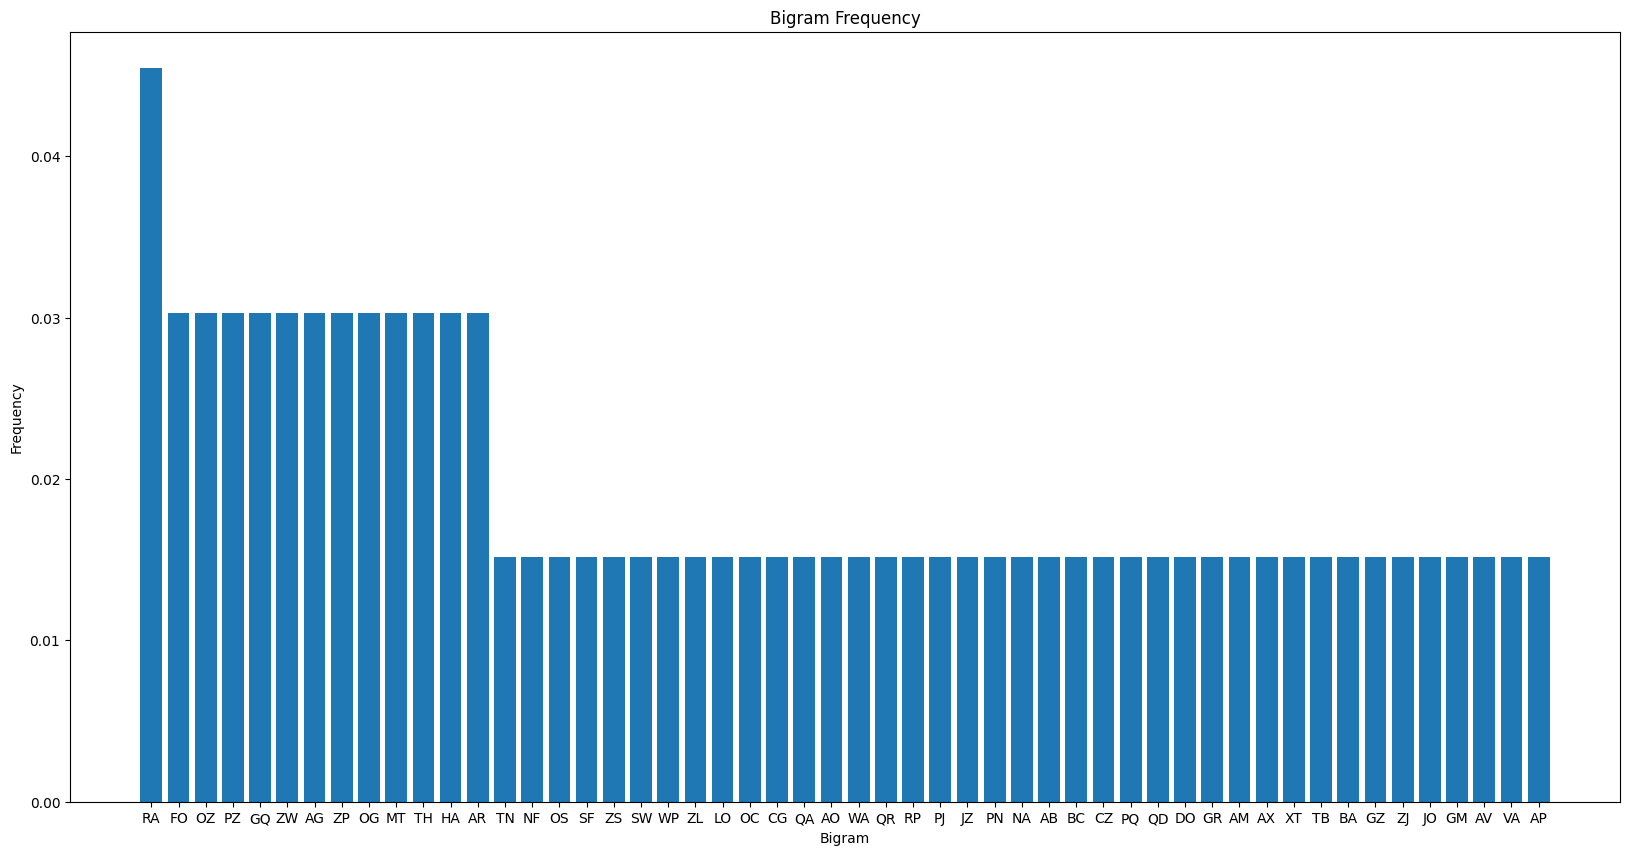

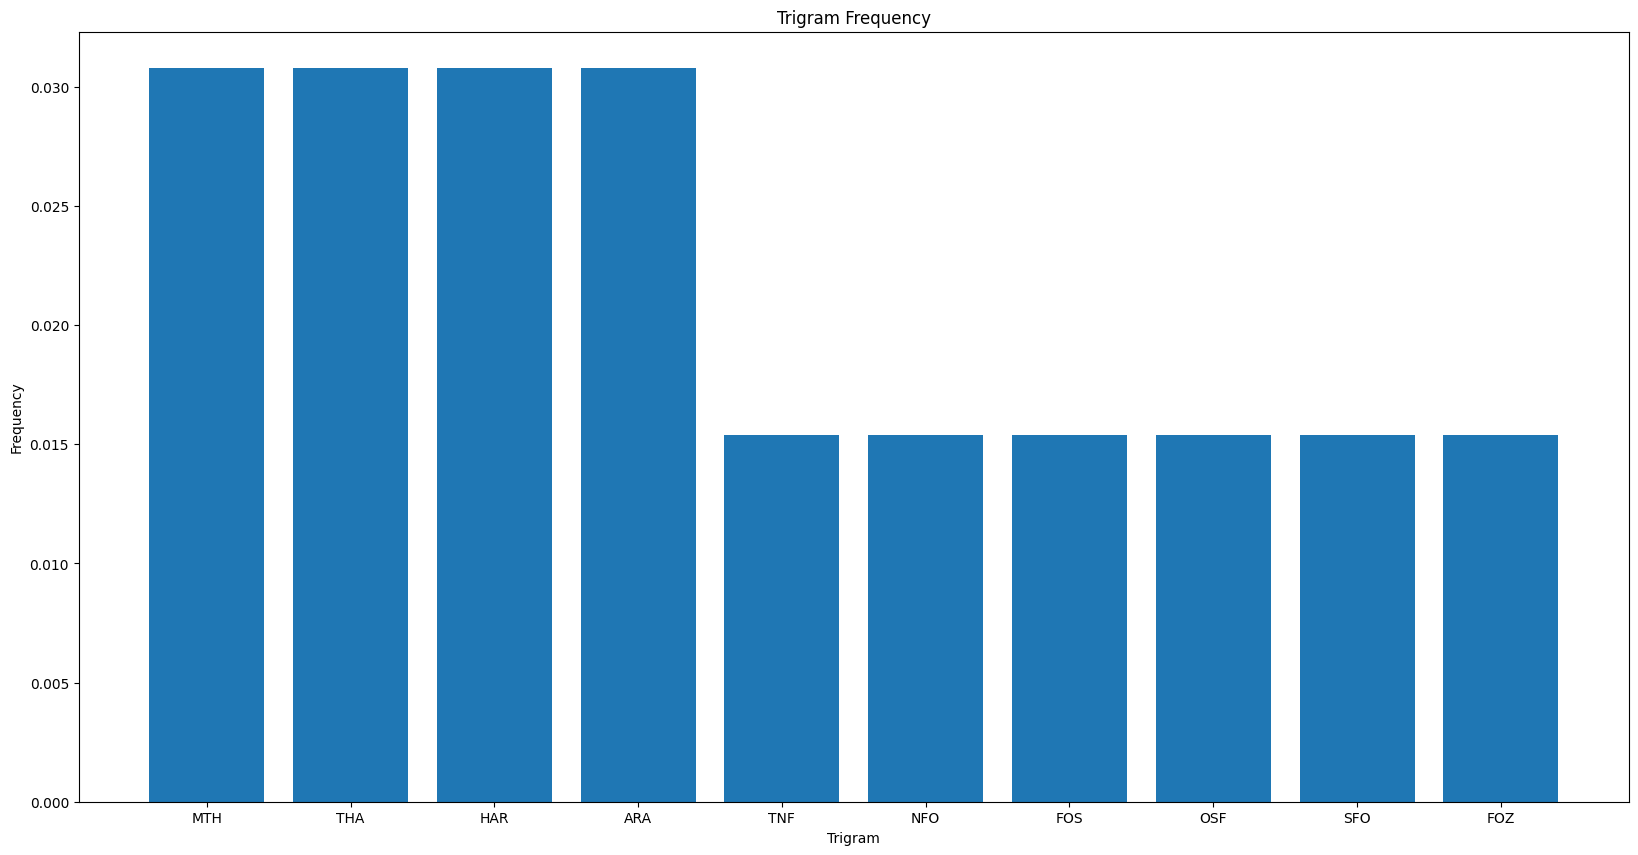

In [90]:
# Count the frequency of each letter in the ciphertext
from collections import Counter
letter_freq = Counter(ciphertext)

import matplotlib.pyplot as plt
# Display the distribution of the letters sorted by alphabetical order
# Calculate the frequency of each letter
total = sum(letter_freq.values())
letter_freq = {k: v / total for k, v in letter_freq.items()}
top_letter_freq = sorted(letter_freq.items(), key=lambda x: x[1], reverse=True)
x, y = zip(*top_letter_freq)
plt.figure(figsize=(20, 10))
plt.bar(x, y)
plt.xlabel("Letter")
plt.ylabel("Frequency")
plt.title("Letter Frequency")
plt.show()

# Calculate the frequency of bigrams
bigrams = [ciphertext[i:i+2] for i in range(len(ciphertext)-1)]
bigram_freq = Counter(bigrams)
total = sum(bigram_freq.values())
bigram_freq = {k: v / total for k, v in bigram_freq.items()}
top_bigram_freq = sorted(bigram_freq.items(), key=lambda x: x[1], reverse=True)
x, y = zip(*top_bigram_freq)
# set a wide plot
plt.figure(figsize=(20, 10))
plt.bar(x, y)
plt.xlabel("Bigram")
plt.ylabel("Frequency")
plt.title("Bigram Frequency")
plt.show()

# Calculate the frequency of trigrams
trigrams = [ciphertext[i:i+3] for i in range(len(ciphertext)-2)]
trigram_freq = Counter(trigrams)
total = sum(trigram_freq.values())
trigram_freq = {k: v / total for k, v in trigram_freq.items()}
top_trigram_freq = sorted(trigram_freq.items(), key=lambda x: x[1], reverse=True)[:10]
x, y = zip(*top_trigram_freq)
plt.figure(figsize=(20, 10))
plt.bar(x, y)
plt.xlabel("Trigram")
plt.ylabel("Frequency")
plt.title("Trigram Frequency")
plt.show()



Using the frequency analysis, we can make some educated guesses about the letters using standard english letter frequency
- E	12.7
- T	9
- A	8.2
- O	7.5
- I	7
- N	6.7
- S	6.3
- H	6.1
- R	6
- D	4.2
- L	4
- C	2.8
- U	2.8
- M	2.4
- W	2.4
- F	2.2
- G	2
- Y	2
- P	1.9
- B	1.5
- V	1
- K	0.8
- J	0.1
- Q	0.1
- X	0.1
- Z	0.1

### Ciphertext
TNFOSFOZSWPZLOCGQAOZWAGQRPJZPNABCZPQDOGRAMTHARAXTBAGZJOGMTHARAVAPZW



In [91]:
# This function will replace all instances of old_letter with new_letter in the plaintext string
def replace_letter(c_string, p_string, old_letter, new_letter):
     index_of_letter = [index for index, char in enumerate(c_string) if char == old_letter]
     p_array = list(p_string)
     for i in index_of_letter:
         p_array[i] = new_letter

     return ''.join(p_array)

# Test the replace_letter function
str1 = "ABCDE"
str2 = "     "
str2 = replace_letter(str1, str2, "A", "E")
str2 = replace_letter(str1, str2, "D", "T")
print(str1)
print(str2)

ABCDE
E  T 


In [88]:
print(f"*{ciphertext}*")
p = ' ' * len(ciphertext)

# Top 4
p = replace_letter(ciphertext, p,"A", "E")
p = replace_letter(ciphertext, p,"Z", "T")
p = replace_letter(ciphertext, p,"O", "O")
p = replace_letter(ciphertext, p,"P", "A")
print(f"*{p}*")
# Finding the ones for LIBERTY
p = replace_letter(ciphertext, p,"X", "L")
p = replace_letter(ciphertext, p,"B", "B")
p = replace_letter(ciphertext, p,"G", "R")
p = replace_letter(ciphertext, p,"T", "I")
p = replace_letter(ciphertext, p,"J", "Y")
print(f"*{p}*")
# Finding other words
p = replace_letter(ciphertext, p,"R", "M")
p = replace_letter(ciphertext, p,"W", "H")
p = replace_letter(ciphertext, p,"Q", "S")
print(f"*{p}*")
p = replace_letter(ciphertext, p,"M", "G")
p = replace_letter(ciphertext, p,"H", "V")
p = replace_letter(ciphertext, p,"V", "D")
print(f"*{p}*")
p = replace_letter(ciphertext, p,"N", "K")
p = replace_letter(ciphertext, p,"F", "N")
p = replace_letter(ciphertext, p,"S", "W")
print(f"*{p}*")
p = replace_letter(ciphertext, p,"L", "C")
p = replace_letter(ciphertext, p,"C", "U")
print(f"*{p}*")
p = replace_letter(ciphertext, p,"D", "F")

print(f"*{p}*")

*TNFOSFOZSWPZLOCGQAOZWAGQRPJZPNABCZPQDOGRAMTHARAXTBAGZJOGMTHARAVAPZW*
*   O  OT  AT O   EOT E   A TA E  TA  O  E   E E   E T O    E E EAT *
*I  O  OT  AT O R EOT ER  AYTA EB TA  OR E I E ELIBERTYOR I E E EAT *
*I  O  OT HAT O RSEOTHERSMAYTA EB TAS ORME I EMELIBERTYOR I EME EATH*
*I  O  OT HAT O RSEOTHERSMAYTA EB TAS ORMEGIVEMELIBERTYORGIVEMEDEATH*
*IKNOWNOTWHAT O RSEOTHERSMAYTAKEB TAS ORMEGIVEMELIBERTYORGIVEMEDEATH*
*IKNOWNOTWHATCOURSEOTHERSMAYTAKEBUTAS ORMEGIVEMELIBERTYORGIVEMEDEATH*
*IKNOWNOTWHATCOURSEOTHERSMAYTAKEBUTASFORMEGIVEMELIBERTYORGIVEMEDEATH*


## Decoded Message
"I KNOW NOT WHAT COURSE OTHERS MAY TAKE BUT AS FOR ME GIVE ME LIBERTY OR GIVE ME DEATH"